In [ ]:
#Import Libraries
import math
import pandas_datareader as web
import yfinance
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [ ]:
# Get the stock quote
company = 'GC=F'
df = yfinance.download(company, start= '2012-01-01', end='2023-11-30')
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1568.900024,1604.300049,1566.000000,1599.699951,1599.699951,229
2012-01-04,1596.599976,1618.599976,1594.500000,1611.900024,1611.900024,172
2012-01-05,1610.800049,1624.099976,1597.800049,1619.400024,1619.400024,362
2012-01-06,1622.500000,1627.800049,1616.099976,1616.099976,1616.099976,20
2012-01-09,1614.300049,1620.099976,1607.500000,1607.500000,1607.500000,8
...,...,...,...,...,...,...
2023-11-23,1991.900024,1991.900024,1991.500000,1991.500000,1991.500000,6075
2023-11-24,1991.900024,2002.199951,1991.500000,2002.199951,2002.199951,63
2023-11-27,2011.699951,2011.800049,2011.699951,2011.800049,2011.800049,228


In [ ]:
# Get the number of rows and columns in the data set
df.shape

(2995, 6)

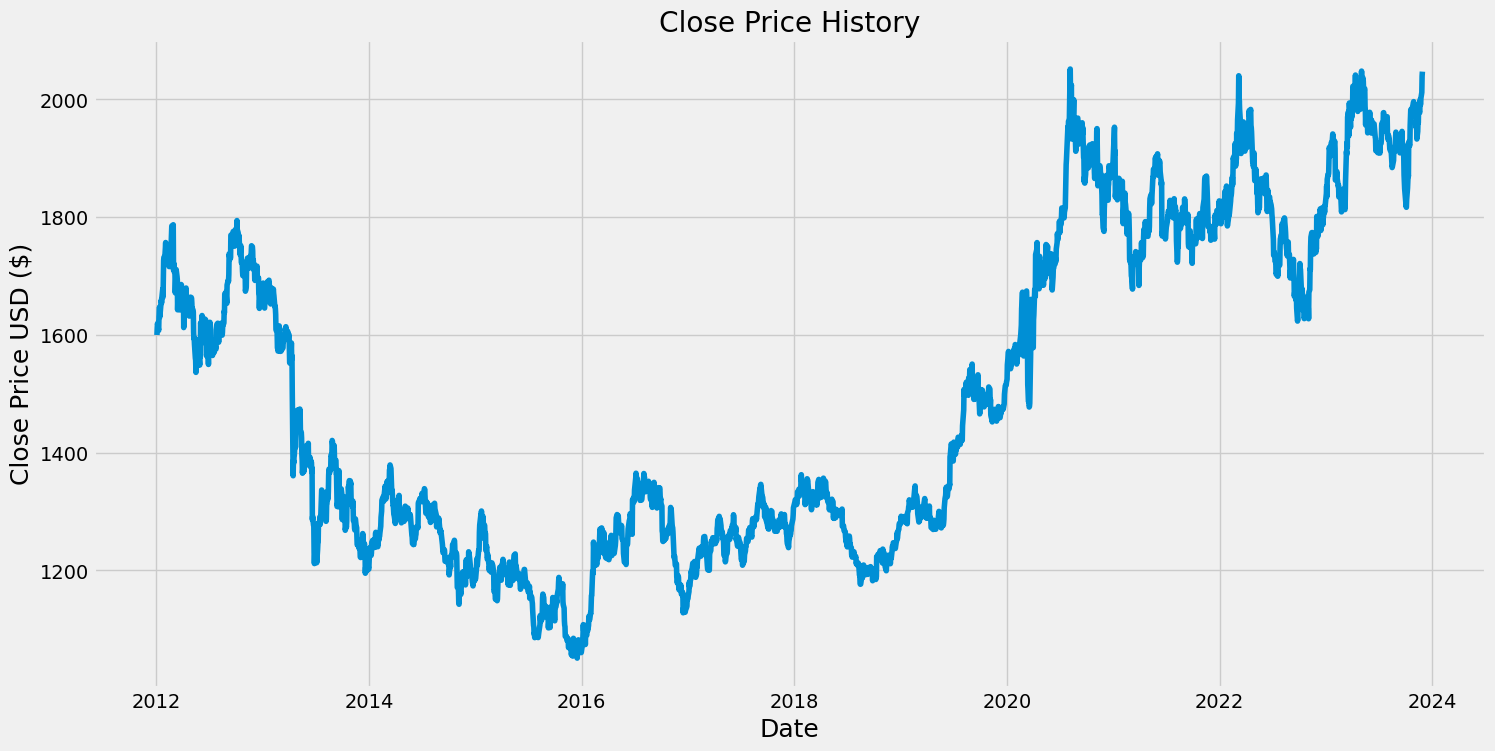

In [ ]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe withg only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len



2396

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.54851597],
       [0.56070751],
       [0.56820226],
       ...,
       [0.96032782],
       [0.9882082 ],
       [0.99560305]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.54851597, 0.56070751, 0.56820226, 0.56490452, 0.55631056,
       0.57979412, 0.58798834, 0.59608277, 0.57919457, 0.60397715,
       0.60827419, 0.60287794, 0.6124712 , 0.62676125, 0.61297085,
       0.64854605, 0.67502751, 0.68052367, 0.67972418, 0.68651947,
       0.69581289, 0.70550618, 0.68661938, 0.67152996, 0.69511343,
       0.67802542, 0.68771858, 0.67202961, 0.67172977, 0.66463476,
       0.67502751, 0.67552716, 0.67322872, 0.7058059 , 0.7186969 ,
       0.7335865 , 0.72379331, 0.72229436, 0.73568501, 0.65863896,
       0.66983108, 0.65753975, 0.65174376, 0.62016589, 0.63205759,
       0.64684717, 0.65963826, 0.64794637, 0.64245022, 0.59128608,
       0.60787444, 0.60427699, 0.61566904, 0.59548309, 0.59878083,
       0.59108627, 0.61107228, 0.634256  , 0.63355654, 0.60667533])]
[0.6009792462160886]

[array([0.54851597, 0.56070751, 0.56820226, 0.56490452, 0.55631056,
       0.57979412, 0.58798834, 0.59608277, 0.57919457, 0.60397715,
       0.60827419, 0.60287794, 0.612

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
# Why we need to reshape the data? Cuz LSTM uses 3D in the form of number of samples, number of time steps and number of features but now rn its 2D

# So now we convert it to 3D  (2338,60,1)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(2336, 60, 1)

In [ ]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2336/2336 [==============================] - 24s 8ms/step - loss: 0.0019


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 2338 to 2997
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets  x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data to 3D shape
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


19/19 [==============================] - 1s 4ms/step


In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

98.28686156615191

<ipython-input-18-6c5af7e6226a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


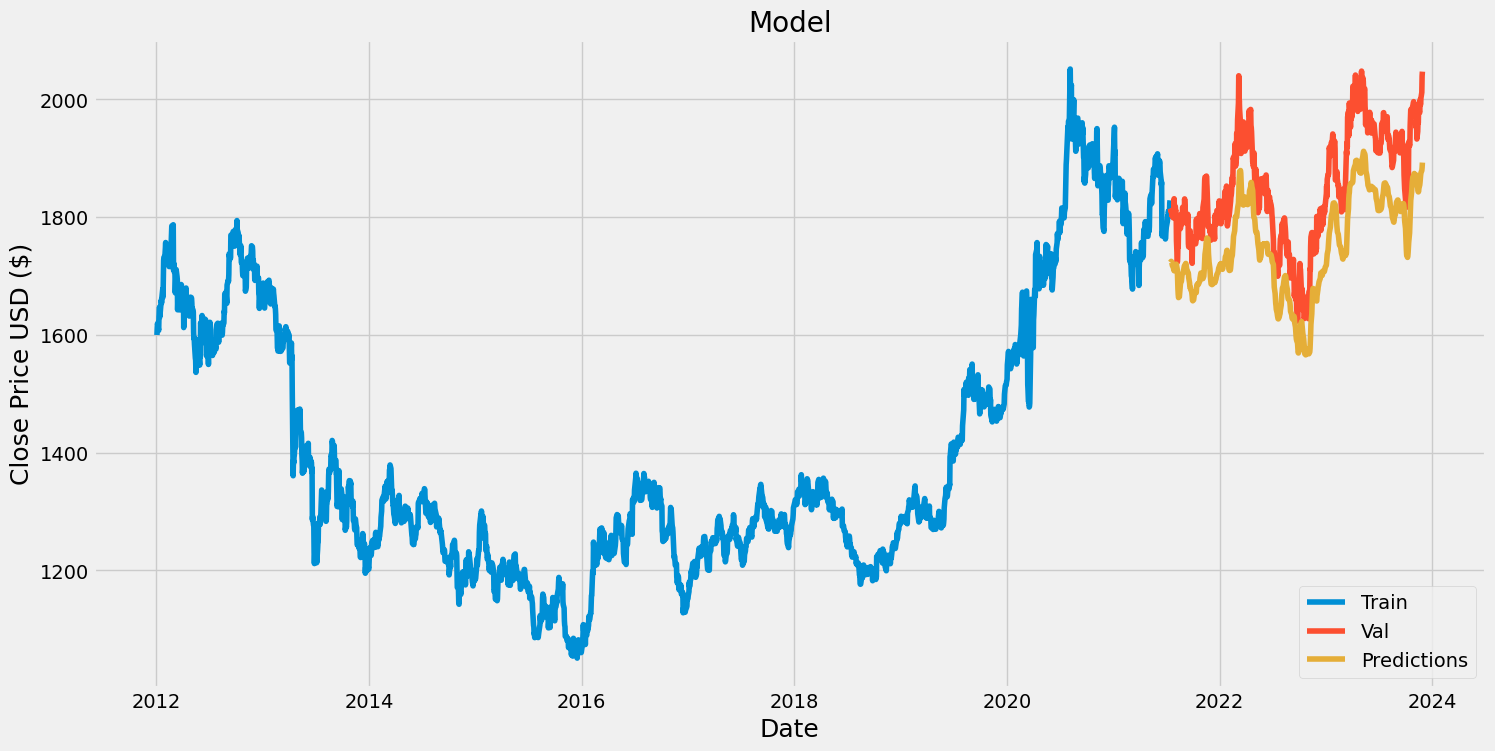

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-08-11,359.959991,347.039124
2021-08-12,362.649994,347.179108
2021-08-13,363.179993,347.552673
2021-08-16,366.559998,348.024200
2021-08-17,358.450012,348.941650
...,...,...
2023-11-22,341.489990,323.244293
2023-11-24,338.230011,324.718597
2023-11-27,334.700012,325.579529


In [ ]:
# Get the quote
quote = yfinance.download(company, start= '2012-01-01', end='2023-12-21')
# Create a new dataframe
new_df = quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to numpy array
X_test = np.array(X_test)
# Reshape the data to 3D
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 20ms/step
[[329.1216]]


In [ ]:
# Get the quote
quote2 = yfinance.download(company, start= '2023-12-21', end='2023-12-22')
print(quote2['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2023-12-21    354.089996
Name: Close, dtype: float64
